In [33]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.datasets import load_breast_cancer
from sklearn import datasets
from sklearn import metrics
from sklearn.naive_bayes import GaussianNB
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

In [34]:
breast = load_breast_cancer()

In [35]:
breast_data = breast.data
breast_data.shape

(569, 30)

In [36]:
breast_input = pd.DataFrame(breast_data)
breast_input.head()

,0,1,2,3,4,5,6,7,8,9,...,20,21,22,23,24,25,26,27,28,29
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [37]:
breast_labels = breast.target
breast_labels.shape

(569,)

In [38]:
labels = np.reshape(breast_labels,(569,1))
final_breast_data = np.concatenate([breast_data,labels],axis=1)
final_breast_data.shape

(569, 31)

In [39]:
breast_dataset = pd.DataFrame(final_breast_data)
features = breast.feature_names
features

array(['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness', 'mean compactness', 'mean concavity',
       'mean concave points', 'mean symmetry', 'mean fractal dimension',
       'radius error', 'texture error', 'perimeter error', 'area error',
       'smoothness error', 'compactness error', 'concavity error',
       'concave points error', 'symmetry error',
       'fractal dimension error', 'worst radius', 'worst texture',
       'worst perimeter', 'worst area', 'worst smoothness',
       'worst compactness', 'worst concavity', 'worst concave points',
       'worst symmetry', 'worst fractal dimension'], dtype='<U23')

In [40]:
features_labels = np.append(features,'Type')
breast_dataset.columns = features_labels
breast_dataset.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,Type
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0.0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0.0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0.0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0.0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0.0


In [41]:
breast_dataset['Type'].replace(0, 'Benign',inplace=True)
breast_dataset['Type'].replace(1, 'Malignant',inplace=True)

In [42]:
breast_dataset.tail()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,Type
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,...,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,Benign
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,...,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,Benign
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,...,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,Benign
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,...,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,Benign
568,7.76,24.54,47.92,181.0,0.05263,0.04362,0.00000,0.00000,0.1587,0.05884,...,30.37,59.16,268.6,0.08996,0.06444,0.0000,0.0000,0.2871,0.07039,Malignant


In [43]:
# 80% Training split
from sklearn.preprocessing import StandardScaler
y = breast_dataset.loc[:,['Type']].values
x = breast_dataset.loc[:, features].values
x = StandardScaler().fit_transform(x)
X_train, X_test, Y_train, Y_test = train_test_split(x, y, train_size=0.8, test_size=0.2)
y[:10]

array([['Benign'],
       ['Benign'],
       ['Benign'],
       ['Benign'],
       ['Benign'],
       ['Benign'],
       ['Benign'],
       ['Benign'],
       ['Benign'],
       ['Benign']], dtype=object)

In [44]:
#Problem 1

In [45]:
model = GaussianNB()

In [46]:
model.fit(X_train, Y_train.ravel())
print(model)

GaussianNB()


In [47]:
expected = Y_test
predicted = model.predict(X_test)

In [48]:
print(metrics.classification_report(expected, predicted))
print(metrics.confusion_matrix(expected, predicted))

              precision    recall  f1-score   support

      Benign       0.91      0.98      0.94        43
   Malignant       0.99      0.94      0.96        71

    accuracy                           0.96       114
   macro avg       0.95      0.96      0.95       114
weighted avg       0.96      0.96      0.96       114

[[42  1]
 [ 4 67]]


In [49]:
# Compare with Logistic Regression
classifier = LogisticRegression(penalty='none',random_state=0)

In [50]:
classifier.fit(X_train, Y_train.ravel())

LogisticRegression(penalty='none', random_state=0)

In [51]:
Y_pred = classifier.predict(X_test)

In [52]:
print(metrics.classification_report(expected, Y_pred))
print(metrics.confusion_matrix(expected, Y_pred))

              precision    recall  f1-score   support

      Benign       0.98      0.93      0.95        43
   Malignant       0.96      0.99      0.97        71

    accuracy                           0.96       114
   macro avg       0.97      0.96      0.96       114
weighted avg       0.97      0.96      0.96       114

[[40  3]
 [ 1 70]]


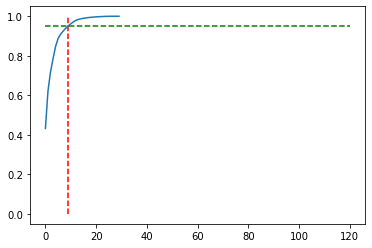

In [53]:
# Problem 2

#Decide the number of PCA components
from sklearn.decomposition import PCA
pca = PCA(random_state=88)
pca.fit(X_train)
explained_variance = np.cumsum(pca.explained_variance_ratio_)
plt.vlines(x=9, ymax=1, ymin=0, colors='r', linestyle="--")
plt.hlines(y=0.95, xmax=120, xmin=0, colors="g", linestyles="--")
plt.plot(explained_variance)
#principalComponents = pca.fit_transform(x)
#principalDf = pd.DataFrame(data=principalComponents
#                          , columns=['principal component 1', 'principal component 2'])

In [54]:
# Train PCA model
pca_final = PCA(0.95)
df_train_pca = pca_final.fit_transform(X_train)

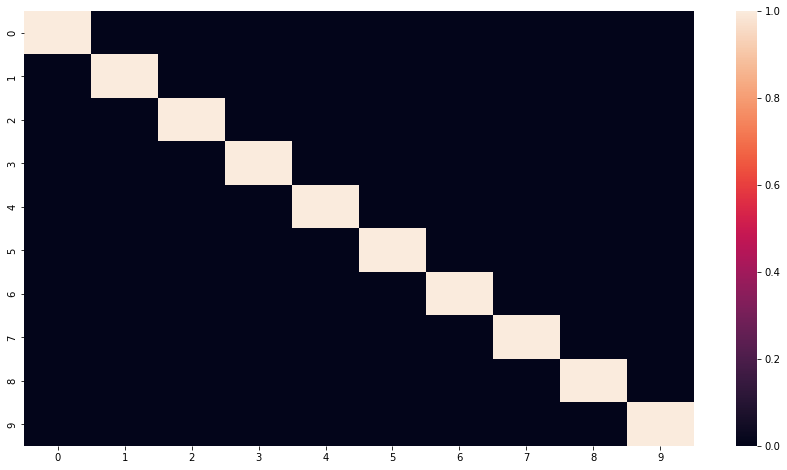

In [55]:
# Correlations between components
corr_mat = np.corrcoef(df_train_pca.transpose())
plt.figure(figsize=[15,8])
sns.heatmap(corr_mat)
plt.show()

In [56]:
# Apply PCA model to test data
df_test_pca = pca_final.transform(X_test)
# Train Logistic Regression
LR = LogisticRegression()
LR_model = LR.fit(df_train_pca, Y_train.ravel())

In [57]:
# Model Evaluation
Y_pred_pca = LR_model.predict(df_test_pca)
cnf_matrix = metrics.confusion_matrix(Y_test, Y_pred_pca)
cnf_matrix

array([[41,  2],
       [ 1, 70]], dtype=int64)

In [58]:
# Evaluate accuracy, precision, and recall
print("Accuracy:",metrics.accuracy_score(Y_test, Y_pred_pca))
print("Precision:",metrics.precision_score(Y_test, Y_pred_pca, pos_label='Benign'))
print("Recall:",metrics.recall_score(Y_test, Y_pred_pca, pos_label='Benign'))
Accuracy = []
Precision = []
Recall = []
k = range(1,len(features)+1)

Accuracy: 0.9736842105263158
Precision: 0.9761904761904762
Recall: 0.9534883720930233


In [59]:
# Plot Model Performance vs # of Principal Components
for i in k:
    pca_final = PCA(n_components=i)
    df_train_pca = pca_final.fit_transform(X_train)
    df_test_pca = pca_final.transform(X_test)
    LR = LogisticRegression()
    LR_model = LR.fit(df_train_pca, Y_train.ravel())
    Y_pred_pca = LR_model.predict(df_test_pca)
    #print("K = ", i)
    #print("Accuracy:",metrics.accuracy_score(Y_test, Y_pred_pca))
    #print("Precision:",metrics.precision_score(Y_test, Y_pred_pca, pos_label='Benign'))
    #print("Recall:",metrics.recall_score(Y_test, Y_pred_pca, pos_label='Benign'))
    Accuracy.append(metrics.accuracy_score(Y_test, Y_pred_pca))
    Precision.append(metrics.precision_score(Y_test, Y_pred_pca, pos_label='Benign'))
    Recall.append(metrics.recall_score(Y_test, Y_pred_pca, pos_label='Benign'))

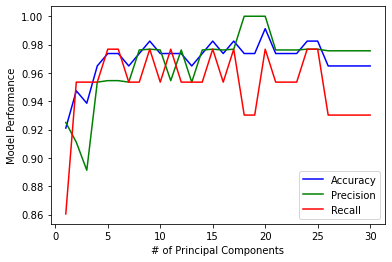

In [60]:
plt.plot(k, Accuracy, 'b', label="Accuracy")
plt.plot(k, Precision, 'g', label="Precision")
plt.plot(k, Recall, 'r', label="Recall")
plt.xlabel("# of Principal Components")
plt.ylabel("Model Performance")
plt.legend()
plt.show()

In [61]:
# Problem 3

In [62]:
model = GaussianNB()
model.fit(df_train_pca, Y_train.ravel())
k = range(1,len(features)+1)
Accuracy_NB = []
Precision_NB = []
Recall_NB = []

In [63]:
for i in k:
    pca_final = PCA(n_components=i)
    df_train_pca = pca_final.fit_transform(X_train)
    df_test_pca = pca_final.transform(X_test)
    model = GaussianNB()
    model.fit(df_train_pca, Y_train.ravel())
    Y_pred_pca = model.predict(df_test_pca)
    #DEBUG print("K = ", i)
    #DEBUG print("Accuracy:",metrics.accuracy_score(Y_test, Y_pred_pca))
    #DEBUG print("Precision:",metrics.precision_score(Y_test, Y_pred_pca, pos_label='Benign'))
    #DEBUG print("Recall:",metrics.recall_score(Y_test, Y_pred_pca, pos_label='Benign'))
    Accuracy_NB.append(metrics.accuracy_score(Y_test, Y_pred_pca))
    Precision_NB.append(metrics.precision_score(Y_test, Y_pred_pca, pos_label='Benign'))
    Recall_NB.append(metrics.recall_score(Y_test, Y_pred_pca, pos_label='Benign'))

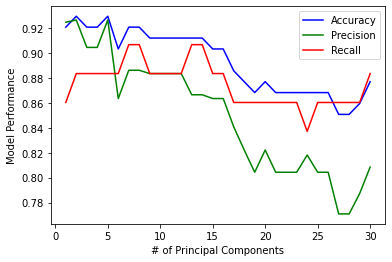

In [64]:
plt.plot(k, Accuracy_NB, 'b', label="Accuracy")
plt.plot(k, Precision_NB, 'g', label="Precision")
plt.plot(k, Recall_NB, 'r', label="Recall")
plt.xlabel("# of Principal Components")
plt.ylabel("Model Performance")
plt.legend()
plt.show()